In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
feature = ["pregnant", "glucose", "diastolic BP", "subcutaneous fat", "serum insulin", "BMI", "diabetes pedigree function", "age", "Diabetes(=1)"]
df.columns = feature
df

,pregnant,glucose,diastolic BP,subcutaneous fat,serum insulin,BMI,diabetes pedigree function,age,Diabetes(=1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


欠測データ削除

In [ ]:
df2 = df[(df["glucose"]!=0) & (df["diastolic BP"]!=0) & (df["subcutaneous fat"]!=0) & (df["serum insulin"]!=0) & (df["BMI"]!=0)]
df2

,pregnant,glucose,diastolic BP,subcutaneous fat,serum insulin,BMI,diabetes pedigree function,age,Diabetes(=1)
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


データの分割

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
X = df2.iloc[:, :8]#最後の列（Diabetes(=1)）以外を説明変数にする
y = df2.iloc[:, 8:]#最後の列（Diabetes(=1)）を目的変数にする
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train

,pregnant,glucose,diastolic BP,subcutaneous fat,serum insulin,BMI,diabetes pedigree function,age
293,1,128,48,45,194,40.5,0.613,24
480,3,158,70,30,328,35.5,0.344,35
187,1,128,98,41,58,32.0,1.321,33
340,1,130,70,13,105,25.9,0.472,22
51,1,101,50,15,36,24.2,0.526,26
...,...,...,...,...,...,...,...,...
633,1,128,82,17,183,27.5,0.115,22
380,1,107,72,30,82,30.8,0.821,24
243,6,119,50,22,176,27.1,1.318,33
107,4,144,58,28,140,29.5,0.287,37


まずはロジスティック回帰

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


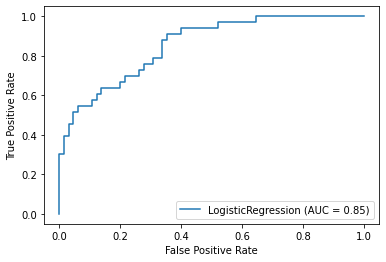

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

ニューラルネットワーク

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


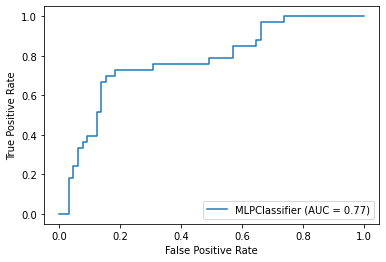

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_train)
disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

カーネルSVM

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


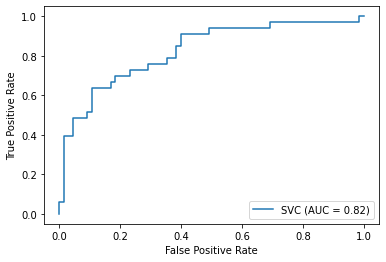

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

ランダムフォレスト

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


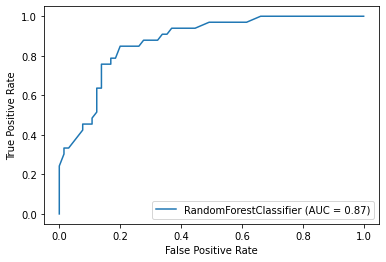

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

k近傍方

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


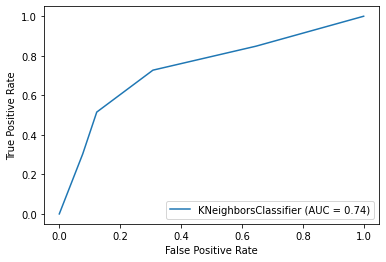

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

変数重要度を調べる

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


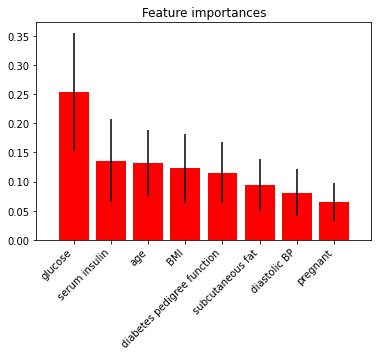

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(np.array(X_train.columns)[indices], importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(np.array(X_train.columns)[indices], rotation=45, ha='right')
plt.xlim([-1, X.shape[1]])
plt.show()

パラメーターのグリッドサーチ

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


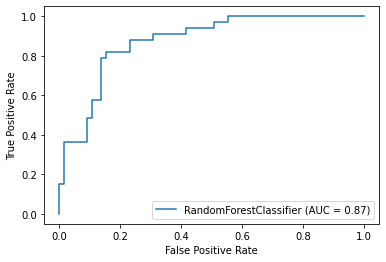

In [ ]:
from sklearn.model_selection import GridSearchCV

scoring = "roc_auc"#グリッドサーチで使う指標

params = {
    'bootstrap':[True, False],
    'class_weight':[None, 'balanced'],
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 2],
    'max_features':['auto', 4, 5],
    'n_estimators':[100, 500]
}

gs = GridSearchCV(RandomForestClassifier(), params, scoring=scoring, n_jobs=2)
gs.fit(X_train, y_train)

model = gs.best_estimator_

disp = plot_roc_curve(model, X_test, y_test)
plt.show()